In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from transformers import AutoTokenizer, DistilBertModel
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [9]:
classification = 'animals'

In [10]:
# create a simple torch model with 1 fully connected layer

class Net(nn.Module):
    def __init__(self, input_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, 2)

    def forward(self, x):
        # apply relu on the output of the fully connected layer
        # x = F.relu(self.fc1(x))
        x = self.fc1(x)
        return x

In [11]:
words = [
    'lion', 'tiger', 'elephant', 'giraffe', 'zebra',
    'cheetah', 'hippopotamus', 'rhinoceros', 'kangaroo', 'koala',
    'panda', 'gorilla', 'monkey', 'chimpanzee', 'lemur',
    'parrot', 'eagle', 'hawk', 'owl', 'penguin',
    'dolphin', 'whale', 'shark', 'seal', 'octopus',
    'crocodile', 'alligator', 'snake', 'lizard', 'turtle',
    'frog', 'toad', 'salamander', 'newt', 'iguana',
    'jaguar', 'panther', 'leopard', 'lynx', 'bobcat',
    'wolf', 'fox', 'coyote', 'bear', 'polar bear',
    'penguin', 'otter', 'beaver', 'sloth', 'armadillo',
    'platypus', 'kangaroo', 'koala', 'wombat', 'kookaburra',
    'ostrich', 'emu', 'cassowary', 'kiwi', 'peacock',
    'gazelle', 'antelope', 'impala', 'deer', 'moose',
    'hedgehog', 'porcupine', 'echidna', 'anteater', 'aardvark',
    'camel', 'llama', 'alpaca', 'giraffe', 'okapi',
    'horse', 'zebra', 'donkey', 'mule', 'pony',
    'cow', 'goat', 'sheep', 'pig', 'rabbit',
    'hamster', 'guinea pig', 'gerbil', 'mouse', 'rat',
    'dog', 'cat', 'ferret', 'rabbit', 'chinchilla',
    'parakeet', 'canary', 'cockatoo', 'budgerigar', 'finch'
    'koala', 'giraffe', 'rhinoceros', 'kangaroo', 'penguin',
    'dolphin', 'shark', 'seal', 'octopus', 'snake',
    'iguana', 'panther', 'leopard', 'lynx', 'bobcat',
    'wolf', 'fox', 'coyote', 'bear', 'polar bear',
    'otter', 'beaver', 'sloth', 'armadillo', 'platypus',
    'kookaburra', 'ostrich', 'emu', 'cassowary', 'kiwi',
    'peacock', 'impala', 'deer', 'moose', 'hedgehog',
    'echidna', 'anteater', 'aardvark', 'alpaca', 'okapi',
    'zebra', 'mule', 'pony', 'sheep', 'pig',
    'rabbit', 'gerbil', 'rat', 'cat', 'chinchilla',
    'canary', 'cockatoo', 'finch', 'parrot', 'eagle',
    'hawk', 'owl', 'crocodile', 'alligator', 'lizard',
    'turtle', 'frog', 'toad', 'newt', 'jaguar',
    'cheetah', 'hippopotamus', 'monkey', 'chimpanzee', 'lemur',
    'parakeet', 'budgerigar', 'gazelle', 'antelope', 'impala',
    'porcupine', 'camel', 'llama', 'gazelle', 'impala',
    'camel', 'llama', 'alpaca', 'okapi', 'horse',
    'donkey', 'cow', 'goat', 'sheep', 'rabbit',
    'hamster', 'guinea pig', 'mouse', 'dog', 'ferret'
    'elephant', 'gazelle', 'toucan', 'pangolin', 'armadillo',
    'mongoose', 'lemur', 'tapir', 'meerkat', 'hippopotamus',
    'macaw', 'narwhal', 'gibbon', 'aardwolf', 'panda',
    'quokka', 'wolverine', 'red panda', 'bison', 'gorilla',
    'kudu', 'platypus', 'squirrel', 'raccoon', 'lemming',
    'numbat', 'anteater', 'capybara', 'shrimp', 'platypus',
    'rhinoceros', 'vulture', 'jaguarundi', 'quoll', 'bandicoot',
    'tarsier', 'hyrax', 'dik-dik', 'lemur', 'civet',
    'axolotl', 'fossa', 'stoat', 'okapi', 'glass lizard',
    'coral snake', 'quokka', 'bobcat', 'spider monkey', 'chameleon',
    'coati', 'komodo dragon', 'sun bear', 'sea lion', 'macaque',
    'fennec fox', 'ring-tailed lemur', 'serval', 'sloth', 'orangutan',
    'armadillo', 'hedgehog', 'lynx', 'kookaburra', 'salamander',
    'dragonfly', 'cockroach', 'butterfly', 'moose', 'pangolin',
    'platypus', 'kangaroo', 'sloth', 'quokka', 'cheetah',
    'raccoon', 'lemur', 'lemur', 'pangolin', 'numbat',
    'koala', 'giraffe', 'raccoon', 'tiger', 'penguin',
    'dolphin', 'shark', 'seal', 'snake', 'iguana',
    'otter', 'beaver', 'armadillo', 'kangaroo', 'pangolin',
    'axolotl', 'bonobo', 'caracal', 'dingo', 'eland',
    'finch', 'gerenuk', 'hoopoe', 'ibex', 'javan rhinoceros',
    'kudu', 'lemming', 'markhor', 'numbat', 'okapi',
    'pangolin', 'quokka', 'reindeer', 'serval', 'tuatara',
    'uakari', 'vulture', 'weasel', 'x-ray tetra', 'yak',
    'zebu', 'albatross', 'barracuda', 'chamois', 'dhole',
    'elephant seal', 'fossa', 'gaur', 'horned lizard', 'impala',
    'jellyfish', 'kingfisher', 'lemur', 'manatee', 'narwhal',
    'ocelot', 'puffin', 'quokka', 'rattlesnake', 'sloth',
    'tapir', 'urutu', 'vicuña', 'weasel', 'x-ray tetra',
    'yak', 'zebu', 'anteater', 'bongo', 'caiman',
    'dik-dik', 'elephant shrew', 'flamingo', 'gerbil', 'hedgehog',
    'impala', 'jaguar', 'kangaroo rat', 'lemur', 'mongoose',
    'nudibranch', 'ocelot', 'panda', 'quokka', 'ring-tailed lemur',
    'sloth bear', 'tamarin', 'uakari', 'viperfish', 'weasel',
    'x-ray tetra', 'yak', 'zebu', 'alpaca', 'bandicoot',
    'capybara', 'dhole', 'elephant seal', 'fossa', 'gaur',
    'horned lizard', 'iguana', 'jackal', 'kangaroo rat', 'lemur',
    'manatee', 'numbat', 'ocelot', 'pangolin', 'quokka',
    'raccoon', 'sloth', 'tiger', 'uakari', 'vulture',
    'ant', 'butterfly', 'caterpillar', 'dragonfly', 'earwig',
    'firefly', 'grasshopper', 'honeybee', 'inchworm', 'junebug',
    'katydid', 'ladybug', 'millipede', 'nematode', 'ostracod',
    'praying mantis', 'quokka', 'roly-poly (woodlouse)', 'stink bug', 'termite',
    'upland sandpiper', 'vampire bat', 'weevil', 'xenops', 'yellowjacket',
    'zebra butterfly', 'aphid', 'boll weevil', 'centipede', 'damselfly',
    'elephant beetle', 'flea', 'goliath beetle', 'hoverfly', 'inchworm',
    'jumping spider', 'kissing bug', 'luna moth', 'mosquito', 'nudibranch',
    'orchid mantis', 'painted lady butterfly', 'queen butterfly', 'robber fly', 'spider beetle',
    'tsetse fly', 'underwing moth', 'vinegaroon', 'water strider', 'xenops',
    'yellowjacket', 'zebra butterfly', 'antlion', 'butterfly fish', 'cicada', 'dobsonfly',
    'earthworm', 'fiddler crab', 'glowworm', 'harlequin filefish', 'ichneumon wasp',
    'jewel beetle', 'kelp crab', 'ladybug', 'monarch butterfly', 'nettle caterpillar',
    'orchid mantis', 'peacock butterfly', 'quahog', 'rose chafer', 'saddleback caterpillar',
    'tarantula hawk wasp', 'urodid moth', 'violet ground beetle', 'water boatman', 'xenops',
    'yellowjacket', 'zebra butterfly', 'yak', 'zorapteran', 'ant', 'butterfly', 'caterpillar',
    'dragonfly', 'earwig', 'firefly', 'grasshopper', 'honeybee',
]

most_common_words = []

# remove duplicates
words = list(set(words))
most_common_words = list(set(most_common_words))

print(len(words))
print(len(most_common_words))

assert len(list(set(words + most_common_words))) == len(words) + len(most_common_words)

250
0


In [12]:
non_words = [
    "run", "jump", "eat", "sleep", "think", "happy", "fast", "slow", "beautiful", "smart",
    "quickly", "easily", "always", "never", "under", "over", "beside", "between", "through", "with",
    "and", "but", "or", "because", "although", "well", "yes", "no", "oh", "wow", "ouch",
    "go", "come", "stop", "start", "win", "lose", "hot", "cold", "loud", "soft",
    "bright", "dark", "high", "low", "near", "far", "big", "small", "old", "new",
    "first", "last", "next", "previous", "good", "bad", "happy", "sad", "rich", "poor",
    "early", "late", "hard", "easy", "simple", "complex", "right", "wrong", "true", "false",
    "up", "down", "in", "out", "on", "off", "up", "down", "here", "there",
    "now", "then", "today", "tomorrow", "yesterday", "soon", "later", "before", "after", "while",
    "once", "twice", "thrice", "nevertheless", "however", "suddenly", "finally", "quickly", "slowly", "nowadays",
    "some", "many", "few", "most", "none", "all", "each", "every", "somebody", "nobody",
    "something", "nothing", "somewhere", "nowhere", "anywhere", "everywhere", "this", "that", "these", "those",
    "which", "what", "who", "whom", "whose", "where", "when", "why", "how", "whether",
    "if", "unless", "because", "since", "although", "though", "while", "before", "after", "when",
    "and", "or", "but", "nor", "for", "so", "yet", "either", "neither", "however"
    "is", "are", "was", "were", "am", "be", "being", "been", "has", "have",
    "had", "do", "does", "did", "doing", "will", "would", "shall", "should", "can",
    "could", "may", "might", "must", "ought", "ain't", "isn't", "aren't", "wasn't", "weren't",
    "hasn't", "haven't", "hadn't", "don't", "doesn't", "didn't", "won't", "wouldn't", "shan't", "shouldn't",
    "can't", "cannot", "couldn't", "mayn't", "mightn't", "mustn't", "oughtn't", "it's", "that's", "who's",
    "what's", "there's", "here's", "when's", "where's", "why's", "how's", "not", "no", "never",
    "none", "nope", "nothing", "nowhere", "nobody", "notwithstanding", "however", "although", "though", "but",
    "yet", "either", "neither", "nor", "or", "and", "also", "more", "less", "most",
    "least", "very", "too", "so", "such", "just", "only", "quite", "almost", "even",
    "well", "better", "best", "worse", "worst", "moreover", "furthermore", "nevertheless", "nonetheless", "however",
    "therefore", "consequently", "thus", "hence", "since", "because", "although", "though", "if", "unless",
    "until", "while", "when", "where", "after", "before", "because", "since", "if", "unless",
    "until", "while", "when", "where", "after", "before", "if", "unless", "while", "when",
    "where", "after", "before", "though", "although", "because", "since", "while", "when", "where",
    "if", "unless", "until", "though", "although", "because", "since", "so", "that", "if",
    "unless", "until", "while", "when", "where", "after", "before", "if", "unless", "until",
    "while", "when", "where", "after", "before", "but", "and", "or", "as", "if",
    "unless", "until", "while", "when", "where", "after", "before", "but", "and", "or",
    "as", "because", "since", "so", "that", "if", "unless", "until", "though", "although",
    "because", "since", "while", "when", "where", "if", "unless", "until", "though", "although",
    "because", "since", "so", "that", "if", "unless", "until", "though", "although", "because",
    "since", "while", "when", "where", "after", "before", "if", "unless", "until", "though",
    "although", "because", "since", "so", "that", "if", "unless", "until", "while", "when",
    "where", "after", "before", "though", "although", "because", "since", "so", "that", "if",
    "unless", "until", "while", "when", "where", "after", "before", "but", "and", "or",
    "as", "because", "since", "so", "that", "if", "unless", "until", "though", "although",
    "because", "since", "while", "when", "where", "if", "unless", "until", "though", "although",
    "because", "since", "so", "that", "if", "unless", "until", "though", "although", "because"
    ",", "Wa", "--", ";", ":", "...", "-", ".", "?", "!", "'", "#", "``", "`", "$", "US$", "C$", "and", "or",
    "But", "but", "million", "billion", "one", "two", "10", "the", "a", "The", "an", "this", "there", "There",
    "Perestroika", "besuboru", "de", "etc.", "of", "for", "on", "new", "other", "last", "many", "higher", "lower",
    "largest", "least", "latest", "best", "1", "2", "3", "4", "5", "will", "would", "could", "can", "may", "all",
    "such", "half", "Such", "All", "Word", "it", "he", "they", "I", "It", "its", "their", "his", "her", "our",
    "n't", "also", "not", "only", "even", "more", "earlier", "less", "better", "longer", "most", "Most", "up",
    "out", "off", "in", "down", "&", "to", "To", "TO", "OK", "Oh", "no", "watch", "haul", "extinguish", "hold",
    "chill", "eat", "surf", "devour", "drive", "sail", "descend", "glide", "throw", "carry", "dine", "call",
    "soar", "walk", "sip", "rinse", "uncork", "skate", "type", "read", "bake", "poke", "consume", "fly", "fasten",
    "hit", "flush", "peel", "dry", "crave", "ride", "sit", "indulge", "chop", "be", "make", "buy", "take", "said",
    "was", "were", "had", "did", "cooling", "heating", "including", "according", "being", "growing", "trying",
    "been", "expected", "made", "compared", "based", "are", "have", "say", "do", "re", "is", "has", "says", "s",
    "does", "which", "that", "That", "THAT", "who", "what", "What", "whom", "Who", "whose", "when", "where", "how",
    "When", "why",
    "apple", "book", "car", "dog", "cat", "house", "tree", "friend", "time", "money",
    "heart", "sun", "moon", "sky", "water", "fire", "earth", "flower", "city", "music",
    "child", "parent", "school", "job", "love", "smile", "day", "night", "star", "cloud",
    "bird", "fish", "food", "computer", "phone", "internet", "coffee", "tea", "shoes", "hat",
    "dream", "goal", "team", "game", "hope", "fear", "joy", "anger", "peace", "war",
    "friendship", "family", "health", "beauty", "knowledge", "power", "nature", "history", "science",
    "art", "happiness", "sadness", "color", "mind", "body", "soul", "memory", "experience", "idea",
    "faith", "truth", "lie", "problem", "solution", "question", "answer", "light", "darkness", "wind",
    "rain", "snow", "smell", "taste", "touch", "sound", "silence", "joy", "freedom", "future",
    "past", "present", "purpose", "journey", "adventure", "discovery", "challenge", "victory", "defeat"
    "time", "person", "year", "way", "day", "man", "government", "company", "number", "child",
    "part", "place", "case", "group", "problem", "fact", "eye", "friend", "charge", "point",
    "home", "hand", "job", "food", "example", "place", "book", "end", "government", "water",
    "room", "mother", "area", "money", "story", "fact", "month", "lot", "right", "study",
    "face", "word", "business", "question", "school", "reason", "air", "mind", "law", "company",
    "word", "number", "order", "example", "market", "name", "door", "value", "position", "body",
    "problem", "theory", "class", "child", "car", "house", "year", "arm", "lot", "father",
    "word", "team", "result", "school", "name", "line", "place", "end", "government", "oil",
    "line", "end", "fire", "company", "example", "name", "water", "person", "home", "country",
    "industry", "back", "mother", "house", "name", "side", "period", "city", "case", "job",
    "air", "team", "problem", "name", "number", "part", "car", "hand", "body", "example",
    "home", "water", "point", "name", "company", "room", "group", "fact", "eye", "lot",
    "question", "place", "government", "word", "end", "number", "problem", "part", "home",
    "case", "job", "lot", "team", "person", "result", "line", "city", "air", "example",
    "water", "place", "number", "name", "door", "money", "team", "word", "person", "end",
    "position", "body", "fire", "problem", "car", "word", "house", "value", "fact", "theory",
    "breeze", "cascade", "serenity", "quasar", "equinox", "fluke", "havoc", "gadget", "nuance", "oblivion",
    "paradox", "quagmire", "reverie", "saga", "thistle", "vortex", "whimsy", "xenon", "yarn", "zenith",
    "clique", "dynamo", "epoch", "fiasco", "glyph", "halo", "icon", "jargon", "kaleidoscope", "labyrinth",
    "memento", "nirvana", "opulence", "pinnacle", "quintessence", "rendezvous", "sonnet", "tryst", "utopia", "vista",
    "wanderlust", "xylophone", "yearning", "zealot", "albatross", "bivouac", "catalyst", "dystopia", "effigy", "fandango"
    "companion", "toast", "lounge", "combination", "majesty", "nutrient", "bark", "rest", "drainage", "time", "drink",
    "journey", "shipment", "measure", "cutlery", "catch", "flutter", "moo", "commute", "score", "indulgence", "cutting",
    "containment", "communication", "transportation", "slice", "drying", "tote", "nurture", "breakfast", "cut", "brush",
    "competition", "signal", "mobility", "conformity", "comfort", "pause", "input", "hygiene", "click", "health",
    "entertainment", "halt", "crunch", "softness", "control", "loyalty", "formality", "individuality", "gallop",
    "protection", "gathering", "pattern", "productivity", "purr", "decoration", "bite", "accessory", "reflection",
    "grace", "support", "scoop", "tick", "flight", "navigation", "descent", "voyage", "thrill", "hug", "knowledge",
    "shield", "transit", "solitude", "heat", "celebration", "adventure", "song", "elegance", "recreation", "roar",
    "trumpet", "container", "aroma", "childhood", "measurement", "sanitation", "vibration", "growth", "safety", "swing",
    "sharpness", "stride", "graze", "excitement", "acidity", "prong", "munch", "person", "bicycle", "car", "motorcycle",
    "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench",
    "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
    "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove",
    "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana",
    "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch",
    "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone",
    "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear",
    "hair drier", "toothbrush", "%", "company", "year", "market", "trading", "Thanksgiving", "Mr.", "U.S.", "New",
    "Corp.", "York", "Containers", "Securities", "Industries", "Materials", "Soviets", "years", "shares", "prices",
    "cents", "funds"
]

# remove duplicates
non_words = list(set(non_words))

print(len(non_words))


730


In [13]:
# force remove words in words from non_words
non_words = list(set(non_words) - set(words))

print(len(non_words))

719


In [14]:
# shuffle non_words
np.random.shuffle(non_words)

# take the same number of non_words as words
non_words = non_words[:len(words)]

print(len(non_words))
print(non_words)

250
['crave', 'discovery', 'protection', 'gallop', 'not', 'many', 'Thanksgiving', 'somebody', 'go', 'half', 'throw', 'food', 'was', 'hug', 'shoes', 'either', "when's", 'cascade', 'doing', 'be', 'icon', 'fact', '1', 'will', 'There', 'smart', 'line', 'Word', "shan't", 'am', 'do', 'knowledge', 'crunch', 'almost', '--', 'higher', 'music', 'rendezvous', 'prices', 'or', 'haul', 'bird', 'whom', 'buy', 'quintessence', 'side', 'hit', 'York', 'say', 'vista', 'But', 'quasar', 'cold', 'hand', 'business', 'pizza', 'softness', 'such', 'coffee', 'lie', 'When', 'havoc', 'drying', 'mother', 'nuance', 'hat', 'couch', 'descent', 'between', '5', 'true', 'million', 'Corp.', 'because', 'a', 'mind', ';', 'book', 'science', 'apple', 'hope', 'type', 'star', 'Materials', 'have', 'does', 'end', 'all', 'nirvana', 'fear', 'fast', 'containment', 'wanderlust', 'C$', 'surf', 'big', "can't", 'bivouac', 'thus', 'as', 'reverie', 'vibration', '10', 'formality', 'art', 'future', 'love', 'cut', 'tea', 'easy', 'suddenly', '

In [15]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [16]:
# create a function that takes a list of words and returns a list of embeddings
def get_embeddings(words):
    embeddings = []

    for word in words:
        input_ids = torch.tensor(tokenizer.encode(word)).unsqueeze(0)
        outputs = model(input_ids)
        last_hidden_states = outputs[0]
        embeddings.append(torch.mean(last_hidden_states[0][1:-1], dim=0).tolist())
    
    assert len(embeddings) == len(words)
    return embeddings

embeddings = get_embeddings(words)
most_common_embeddings = get_embeddings(most_common_words)
non_embeddings = get_embeddings(non_words)

In [17]:
# slice the lists into training and test sets
words_train = words[:int(len(words)*0.8)]
words_test = words[int(len(words)*0.8):]
embeddings_train = embeddings[:int(len(embeddings)*0.8)]
embeddings_test = embeddings[int(len(embeddings)*0.8):]

most_common_words_train = most_common_words[:int(len(most_common_words)*0.8)]
most_common_words_test = most_common_words[int(len(most_common_words)*0.8):]
most_common_embeddings_train = most_common_embeddings[:int(len(most_common_embeddings)*0.8)]
most_common_embeddings_test = most_common_embeddings[int(len(most_common_embeddings)*0.8):]

non_words_train = non_words[:int(len(non_words)*0.8)]
non_words_test = non_words[int(len(non_words)*0.8):]
non_embeddings_train = non_embeddings[:int(len(non_embeddings)*0.8)]
non_embeddings_test = non_embeddings[int(len(non_embeddings)*0.8):]

# create a dataframe with the training sets
train_embeddings = embeddings_train + most_common_embeddings_train + non_embeddings_train
df_train = pd.DataFrame(train_embeddings)
# convert the column names to strings
df_train.columns = [str(i) for i in df_train.columns]

df_train['label'] = [1]*len(words_train) + [1]*len(most_common_words_train) + [0]*len(non_words_train)
df_train['word'] = words_train + most_common_words_train + non_words_train

# create a dataframe with the test sets
test_embeddings = embeddings_test + most_common_embeddings_test + non_embeddings_test
df_test = pd.DataFrame(test_embeddings)
# convert the column names to strings
df_test.columns = [str(i) for i in df_test.columns]

df_test['label'] = [1]*len(words_test) + [1]*len(most_common_words_test) + [0]*len(non_words_test)
df_test['word'] = words_test + most_common_words_test + non_words_test

# df_train = pd.DataFrame({
#     'word': words_train + most_common_words_train + non_words_train,
#     'embedding': embeddings_train + most_common_embeddings_train + non_embeddings_train,
#     'label': [1]*len(words_train) + [1]*len(most_common_words_train) + [0]*len(non_words_train)
# })

# df_test = pd.DataFrame({
#     'word': words_test + most_common_words_test + non_words_test,
#     'embedding': embeddings_test + most_common_embeddings_test + non_embeddings_test,
#     'label': [1]*len(words_test) + [1]*len(most_common_words_test) + [0]*len(non_words_test)
# })

# shuffle the dataframes
# df_train = df_train.sample(frac=1).reset_index(drop=True)
# df_test = df_test.sample(frac=1).reset_index(drop=True)

print(df_train[:5])
print(df_train[-5:])
print(df_test[:5])
print(df_test[-5:])

          0         1         2         3         4         5         6  \
0 -0.436517  0.082376 -0.117441  0.079402  0.546381 -0.348047 -0.230370   
1 -0.119631  0.231739 -0.495960 -0.110882  0.419679 -0.020026  0.216787   
2  0.162767  0.166698 -0.256095 -0.151458  0.248644 -0.026399  0.546556   
3  0.342536  0.066485 -0.220430 -0.353014  0.421823  0.354513  0.396531   
4  0.104985 -0.739651 -0.490249 -0.403963  0.692212  0.070306  0.465582   

          7         8         9  ...       760       761       762       763  \
0  0.277662 -0.433875 -0.088455  ...  0.556062 -0.408023  0.038898  0.090331   
1  0.742388  0.114467 -0.297817  ...  0.381702  0.428329 -0.006105  0.107592   
2  0.183045 -0.179935 -0.397730  ... -0.034845 -0.010666  0.012069 -0.121524   
3  0.193945  0.341388 -0.359186  ... -0.025374  0.196869  0.186752 -0.325863   
4  0.552308 -0.443642 -0.020335  ...  0.325553 -0.325238 -0.022325  0.020837   

        764       765       766       767  label       word  
0 -0.2

In [18]:
class CustomDataset(Dataset):
    def __init__(self, tokenized_texts, labels):
        self.tokenized_texts = torch.tensor(tokenized_texts)
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.tokenized_texts[idx], self.labels[idx]

In [19]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = torch.device('mps')
device = torch.device('cpu')

In [20]:
def create_dataloaders(df_train, df_test):
    train_dataset = CustomDataset(df_train['embedding'], df_train['label'])
    test_dataset = CustomDataset(df_test['embedding'], df_test['label'])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

    return train_loader, test_loader

In [21]:
def train_model(train_loader, input_size):

    # train the model
    net = Net(input_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.003)

    num_epochs = 100
    net.to(device)

    best_combined_loss = float('inf')

    for epoch in range(num_epochs):
        net.train()
        combined_loss = 0
        for batch in train_loader:
            # get data to GPU if possible
            data = batch[0].to(device=device, dtype=torch.float32)
            if len(data.shape) == 1:
                data = data.unsqueeze(1)
            # data = data.unsqueeze(1)
            targets = batch[1].to(device=device)
            # print(data.shape)
            
            # forward
            scores = net(data)
            loss = criterion(scores, targets)
            combined_loss += loss.item()

            # backward
            optimizer.zero_grad()
            loss.backward()

            # gradient descent or adam step
            optimizer.step()

        if combined_loss < best_combined_loss:
            best_combined_loss = combined_loss
        
        # print initial loss
        # if epoch == 0:
        #     print(f'Initial loss: {combined_loss/len(train_loader)}')
            
        # print average loss per epoch every 10 epochs
        # if (epoch + 1) % 10 == 0:
        #     print(f'Epoch {epoch + 1}, loss={combined_loss/len(train_loader)}')
        #     # print(combined_loss / len(train_loader))

    return net, best_combined_loss



In [22]:
# evaluate the net using sklearn metrics
def evaluate_net(loader, net):
    y_true = []
    y_pred = []

    net.eval()
    with torch.no_grad():
        for batch in loader:
            # get data to GPU if possible
            data = batch[0].to(device=device, dtype=torch.float32)
            if len(data.shape) == 1:
                data = data.unsqueeze(1)
            # data = data.unsqueeze(1)
            targets = batch[1].to(device=device)

            # forward
            scores = net(data)
            _, predictions = scores.max(1)
            y_true.extend(targets.tolist())
            y_pred.extend(predictions.tolist())

    accuracy = accuracy_score(y_true, y_pred)
    # precision = precision_score(y_true, y_pred)
    # recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    return accuracy, f1
    # return accuracy, precision, recall, f1

# def check_accuracy(loader, net):
#     num_correct = 0
#     num_samples = 0
#     net.eval()

#     with torch.no_grad():
#         for batch in loader:
#             # get data to GPU if possible
#             data = batch[0].to(device=device, dtype=torch.float32)
#             data = data.unsqueeze(1)
#             targets = batch[1].to(device=device)

#             # forward
#             scores = net(data)
#             _, predictions = scores.max(1)
#             num_correct += (predictions == targets).sum()
#             num_samples += predictions.size(0)
    
#     return num_correct / num_samples

In [23]:
# go through all the slices of the dataframe and train and evaluate the model

all_test_accs = []
all_test_f1s = []
all_combined_losses = []

for slice in range(768):
    print(f'Slice: {slice}')
    # slice = 0

    # create one column slice of the dataframe
    df_train_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(slice)],
        'label': df_train['label']
    })

    df_test_slice = pd.DataFrame({
        # 'word': df_test['word'],
        'embedding': df_test[str(slice)],
        'label': df_test['label']
    })

    # print(df_train_slice[:5])
    # print(df_train_slice[-5:])

    train_slice_loader, test_slice_loader = create_dataloaders(df_train_slice, df_test_slice)

    # take the best of 3 runs
    best_test_acc = 0
    best_test_f1 = 0

    for i in range(10):
        net, best_combined_loss = train_model(train_slice_loader, 1)

        # train_acc, train_f1 = evaluate_net(train_slice_loader, net)
        test_acc, test_f1 = evaluate_net(test_slice_loader, net)

        if test_acc > best_test_acc and test_f1 > best_test_f1:
            best_test_acc = test_acc
            best_test_f1 = test_f1
            # best_train_acc = train_acc
            # best_net = net
    
    all_test_accs.append(best_test_acc)
    all_test_f1s.append(best_test_f1)
    all_combined_losses.append(best_combined_loss)

    # print(f'Accuracy on training set: {check_accuracy(train_loader, net)*100:.2f}%')
    # print(f'Accuracy on test set: {check_accuracy(test_loader, net)*100:.2f}%')

    print(f'Slice {slice} best combined loss: {best_combined_loss}')
    print(f'Slice {slice} best test f1: {best_test_f1:.4f}')
    print(f'Slice {slice} best test accuracy: {best_test_acc*100:.2f}% \n')

print(len(all_test_accs))
# print(len(all_test_f1s))

Slice: 0


Slice 0 best combined loss: 17.324804544448853
Slice 0 best test f1: 0.6723
Slice 0 best test accuracy: 61.00% 

Slice: 1
Slice 1 best combined loss: 17.01518851518631
Slice 1 best test f1: 0.5524
Slice 1 best test accuracy: 53.00% 

Slice: 2
Slice 2 best combined loss: 12.787757903337479
Slice 2 best test f1: 0.6990
Slice 2 best test accuracy: 69.00% 

Slice: 3
Slice 3 best combined loss: 17.282657086849213
Slice 3 best test f1: 0.6038
Slice 3 best test accuracy: 58.00% 

Slice: 4
Slice 4 best combined loss: 16.718941748142242
Slice 4 best test f1: 0.6275
Slice 4 best test accuracy: 62.00% 

Slice: 5
Slice 5 best combined loss: 17.227221846580505
Slice 5 best test f1: 0.5946
Slice 5 best test accuracy: 55.00% 

Slice: 6
Slice 6 best combined loss: 17.195383489131927
Slice 6 best test f1: 0.5357
Slice 6 best test accuracy: 48.00% 

Slice: 7
Slice 7 best combined loss: 16.93068540096283
Slice 7 best test f1: 0.6263
Slice 7 best test accuracy: 63.00% 

Slice: 8
Slice 8 best combined loss

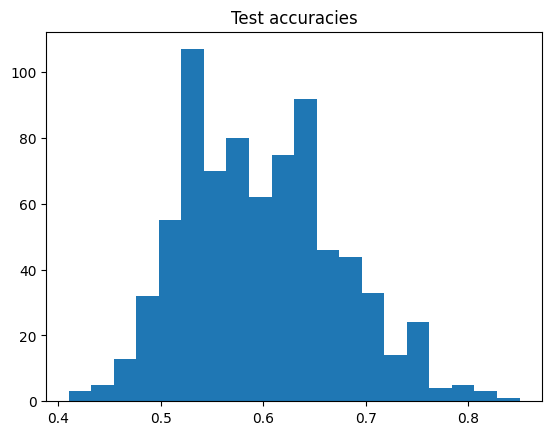

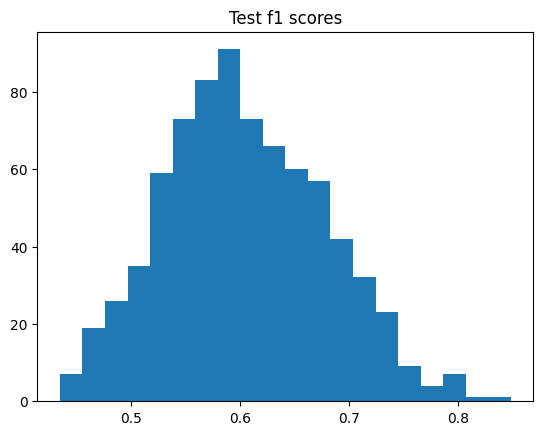

In [24]:
# plot histograms of the test accuracies and f1 scores
plt.hist(all_test_accs, bins=20)
plt.title('Test accuracies')
plt.show()

plt.hist(all_test_f1s, bins=20)
plt.title('Test f1 scores')
plt.show()

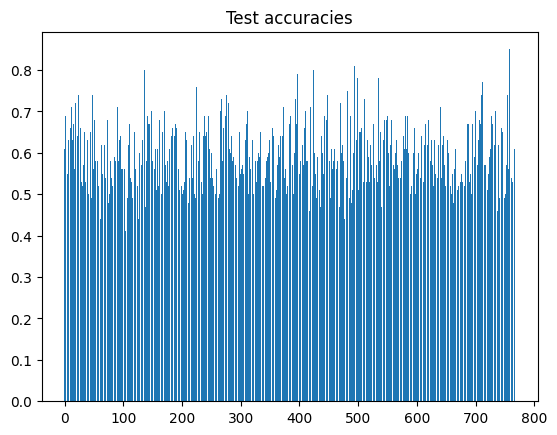

In [25]:
# plot bar chart of the accuracies
plt.bar(range(768), all_test_accs)
plt.title('Test accuracies')
plt.show()

In [26]:
print(all_test_accs[:10]) 

[0.61, 0.53, 0.69, 0.58, 0.62, 0.55, 0.48, 0.63, 0.67, 0.66]


In [27]:
# convert list of tensors into list of floats
all_test_accs_val = [acc.item() for acc in all_test_accs]
all_test_f1s_val = [f1.item() for f1 in all_test_f1s]

print(all_test_accs_val[:10])
print(all_test_f1s_val[:10])

[0.61, 0.53, 0.69, 0.58, 0.62, 0.55, 0.48, 0.63, 0.67, 0.66]
[0.6722689075630253, 0.5523809523809523, 0.6990291262135921, 0.6037735849056605, 0.6274509803921569, 0.5945945945945946, 0.5357142857142857, 0.6262626262626263, 0.6732673267326733, 0.6382978723404256]


In [28]:
all_test_accs_val = np.array(all_test_accs_val)
all_test_f1s_val = np.array(all_test_f1s_val)
all_combined_losses = np.array(all_combined_losses)

In [29]:
# find the indices of the top 10 slices
top_10_indices = np.argsort(all_test_accs_val)[-10:]
top_10_indices_f1 = np.argsort(all_test_f1s_val)[-10:]
print(top_10_indices)
print(top_10_indices_f1)
print(all_test_accs_val[top_10_indices])
print(all_test_f1s_val[top_10_indices])
print(all_combined_losses[top_10_indices])

[499 397 706 222 424 136 494 556 215 758]
[712 706 136 424 535 494 222 556 215 758]
[0.78 0.79 0.79 0.8  0.8  0.8  0.81 0.82 0.82 0.85]
[0.77083333 0.77894737 0.78787879 0.80392157 0.79591837 0.79166667
 0.8        0.80434783 0.82352941 0.84848485]
[11.14933638 13.11857915 15.35381612 12.90410975 11.06929508 14.02669913
 10.47950563 12.66971368 10.35953695 12.37403855]


In [30]:
# create a dataframe with accuracy and loss
df_acc_loss = pd.DataFrame({
    'accuracy': all_test_accs_val,
    'f1': all_test_f1s,
    'loss': all_combined_losses
})

print(df_acc_loss[:10])

# save the dataframe to a csv file
df_acc_loss.to_csv(f"llm-outputs/{classification}_xl_bruteforce_acc_loss.csv", index=False)

   accuracy        f1       loss
0      0.61  0.672269  17.324805
1      0.53  0.552381  17.015189
2      0.69  0.699029  12.787758
3      0.58  0.603774  17.282657
4      0.62  0.627451  16.718942
5      0.55  0.594595  17.227222
6      0.48  0.535714  17.195383
7      0.63  0.626263  16.930685
8      0.67  0.673267  15.844963
9      0.66  0.638298  15.800685


## Analysis

In [31]:
# for each of the top 10 slices,
# average the embeddings of the pro words and the non words

pro_emb_avg = []
non_emb_avg = []

for i in top_10_indices:
    df_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(i)],
        'label': df_train['label']
    })

    df_slice_pro = df_slice[df_slice['label'] == 1]
    df_slice_non = df_slice[df_slice['label'] == 0]

    pro_emb_avg.append(np.mean(df_slice_pro['embedding']))
    non_emb_avg.append(np.mean(df_slice_non['embedding']))

# create a dataframe with the average embeddings
df_top10_avg = pd.DataFrame({
    'index': top_10_indices,
    'pro': pro_emb_avg,
    'non': non_emb_avg,
    'diff': abs(np.array(pro_emb_avg) - np.array(non_emb_avg)),
    'acc': all_test_accs_val[top_10_indices],
    'f1': all_test_f1s_val[top_10_indices],
    'loss': all_combined_losses[top_10_indices]
})

print(df_top10_avg)

# save the dataframe to a csv file
df_top10_avg.to_csv(f"llm-outputs/{classification}_xl_bruteforce_top10_metrics.csv", index=False)

   index       pro       non      diff   acc        f1       loss
0    499  0.246629 -0.191776  0.438406  0.78  0.770833  11.149336
1    397  0.069576  0.391739  0.322162  0.79  0.778947  13.118579
2    706 -0.075977  0.079153  0.155129  0.79  0.787879  15.353816
3    222 -0.348770  0.018555  0.367325  0.80  0.803922  12.904110
4    424  0.214514 -0.196672  0.411185  0.80  0.795918  11.069295
5    136 -0.034428  0.236892  0.271320  0.80  0.791667  14.026699
6    494 -0.101754 -0.588824  0.487070  0.81  0.800000  10.479506
7    556 -0.026909  0.322257  0.349166  0.82  0.804348  12.669714
8    215  0.092189 -0.218090  0.310278  0.82  0.823529  10.359537
9    758  0.131143  0.484230  0.353087  0.85  0.848485  12.374039


In [32]:
def plot_axis_hist(slice):
    df_slice = pd.DataFrame({
        # 'word': df_train['word'],
        'embedding': df_train[str(slice)],
        'label': df_train['label']
    })

    df_slice_pro = df_slice[df_slice['label'] == 1]
    df_slice_non = df_slice[df_slice['label'] == 0]

    # draw a histogram of the embeddings, with the pro words in red and the non-pro words in blue
    plt.hist(df_slice_pro['embedding'], bins=30, color='red', alpha=0.5)
    plt.hist(df_slice_non['embedding'], bins=30, color='blue', alpha=0.5)
    plt.title(f"Axis {slice} histogram")
    plt.show()

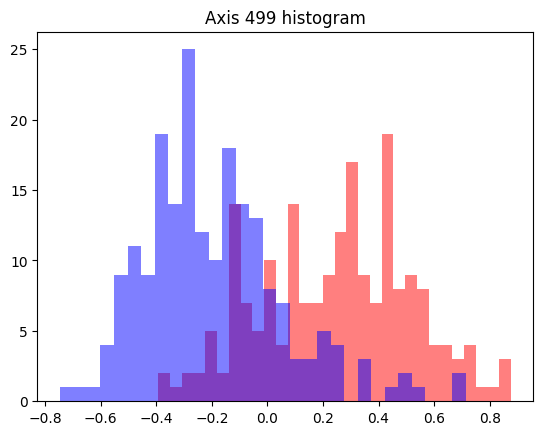

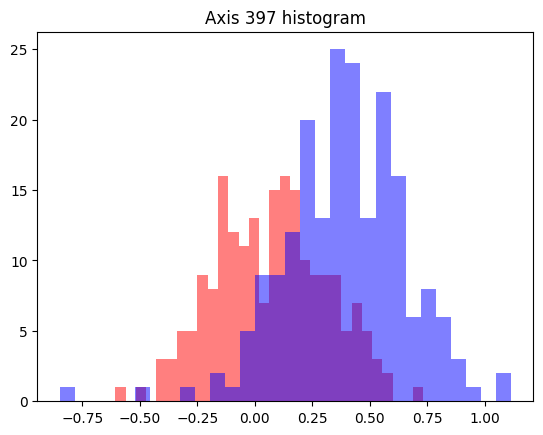

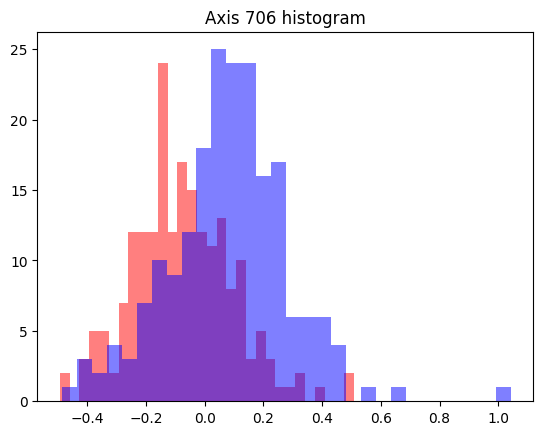

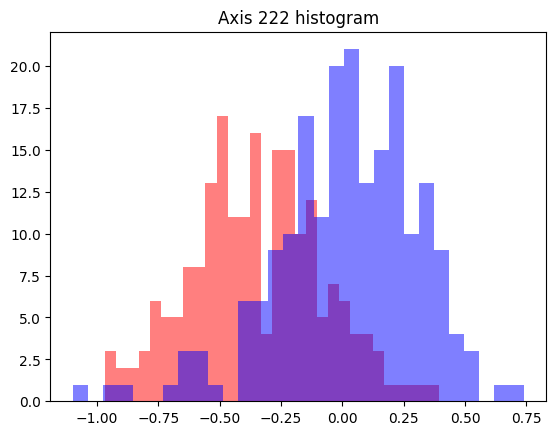

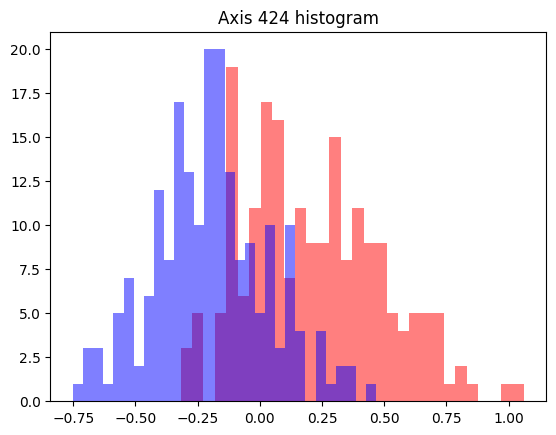

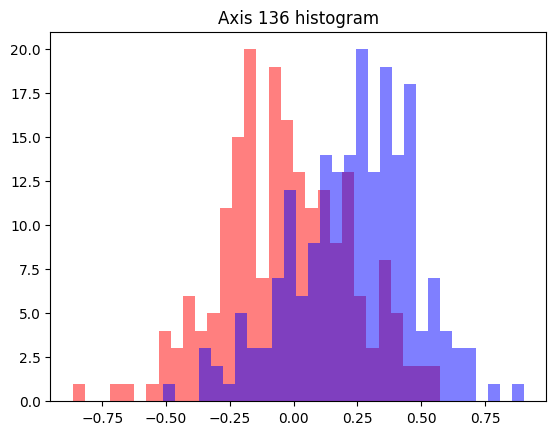

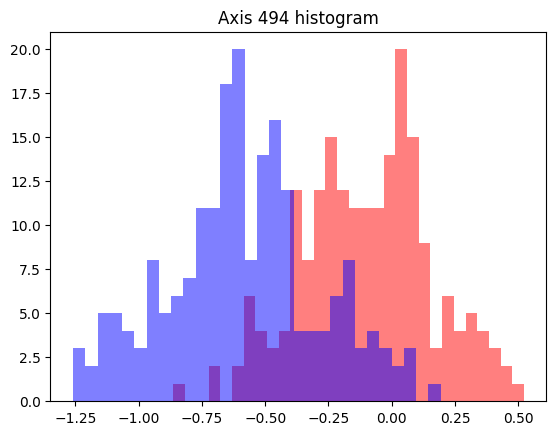

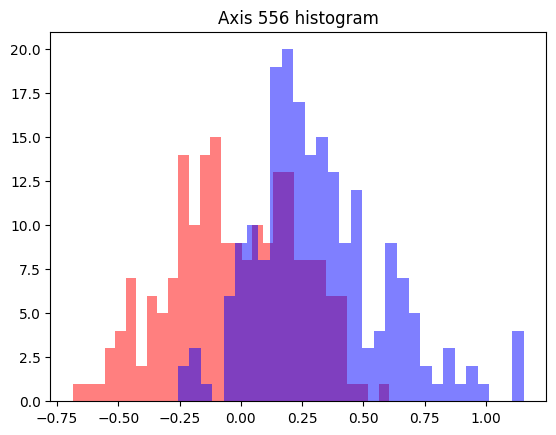

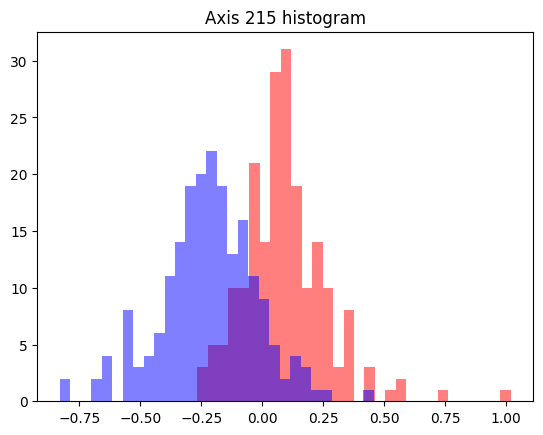

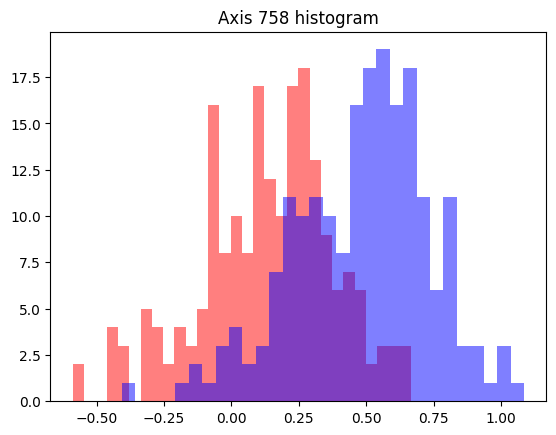

In [33]:
for i in top_10_indices:
    plot_axis_hist(i)

In [34]:
# create a dataframe with the top 10 slices
df_top10 = pd.DataFrame(df_train[str(i)] for i in top_10_indices)
df_top10 = df_top10.T
df_top10.columns = [str(i) for i in df_top10.columns]
df_top10['label'] = df_train['label']
df_top10['word'] = df_train['word']

print(df_top10[:10])

# save the dataframe to a csv file
df_top10.to_csv(f"llm-outputs/{classification}_xl_bruteforce_top10_embs.csv", index=False)

        499       397       706       222       424       136       494  \
0  0.431657  0.064821  0.377156 -0.638771  0.534071  0.354497 -0.460601   
1  0.231306  0.242657 -0.288210 -0.369826  0.507937 -0.089702 -0.349621   
2  0.300747  0.069727 -0.101604 -0.298408  0.307687 -0.687737  0.265503   
3  0.099211  0.432379  0.047248 -0.236949  0.046957  0.515750 -0.336553   
4  0.582420 -0.014772  0.063312 -0.790455  0.117557  0.176720  0.019057   
5  0.273876 -0.011710 -0.162309 -0.049369  0.170147 -0.045084 -0.112365   
6 -0.054130  0.471196 -0.053404  0.081444 -0.124577  0.223012 -0.226640   
7  0.039697  0.357349 -0.251778 -0.058683 -0.122325  0.298323 -0.553601   
8  0.506837  0.368041  0.486176  0.001802  0.180792 -0.065469 -0.168011   
9  0.075118  0.148021 -0.221165 -0.256733  0.073281  0.404816 -0.196204   

        556       215       758  label          word  
0 -0.353696  0.047514  0.011183      1     armadillo  
1 -0.447496  0.109397 -0.209692      1         aphid  
2 -0.2176

In [35]:
df_top10_train = pd.DataFrame(df_train[str(i)] for i in top_10_indices)
df_top10_train = df_top10_train.T

# combine all column values into list stored in one column
df_top10_train['embedding'] = df_top10_train.values.tolist()

# remove all columns except the list of embeddings
df_top10_train = df_top10_train[['embedding']]
df_top10_train['label'] = df_train['label']
df_top10_train['word'] = df_train['word']

print(df_top10_train[:10])
print(len(df_top10_train['embedding'][0]))

                                           embedding  label          word
0  [0.431657075881958, 0.0648210272192955, 0.3771...      1     armadillo
1  [0.2313060462474823, 0.2426568567752838, -0.28...      1         aphid
2  [0.30074650049209595, 0.06972742080688477, -0....      1     dobsonfly
3  [0.0992106944322586, 0.43237853050231934, 0.04...      1           dog
4  [0.5824204683303833, -0.014772310853004456, 0....      1       meerkat
5  [0.27387553453445435, -0.011709942482411861, -...      1  glass lizard
6  [-0.054130494594573975, 0.4711960256099701, -0...      1         panda
7  [0.03969671577215195, 0.35734912753105164, -0....      1     crocodile
8  [0.5068366527557373, 0.3680410087108612, 0.486...      1          kiwi
9  [0.07511785626411438, 0.14802074432373047, -0....      1         tapir
10


In [36]:
df_top10_test = pd.DataFrame(df_test[str(i)] for i in top_10_indices)
df_top10_test = df_top10_test.T

# combine all column values into list stored in one column
df_top10_test['embedding'] = df_top10_test.values.tolist()

# remove all columns except the list of embeddings
df_top10_test = df_top10_test[['embedding']]
df_top10_test['label'] = df_test['label']
df_top10_test['word'] = df_test['word']

print(df_top10_test[:10])
print(len(df_top10_test['embedding'][0]))

                                           embedding  label            word
0  [-0.014407634735107422, 0.07927078753709793, -...      1         termite
1  [-0.08871151506900787, 0.3217560350894928, -0....      1          jaguar
2  [0.5244845747947693, 0.04757973179221153, 0.03...      1         macaque
3  [0.05975605919957161, 0.5796441435813904, -0.2...      1       butterfly
4  [0.17751766741275787, 0.01760205812752247, 0.1...      1       barracuda
5  [0.2889769673347473, 0.08111007511615753, 0.15...      1         dik-dik
6  [-0.26205623149871826, 0.23127231001853943, -0...      1           otter
7  [0.21430999040603638, -0.12070945650339127, -0...      1         lemming
8  [1.2155100107192993, -0.3476240634918213, 0.09...      1        cockatoo
9  [0.5378970503807068, -0.14798161387443542, -0....      1  praying mantis
10


In [37]:
top10_train_loader, top10_test_loader = create_dataloaders(df_top10_train, df_top10_test)

# take the best of 3 runs
top10_best_test_acc = 0
top10_best_test_f1 = 0

for i in range(10):
    net, top10_best_combined_loss = train_model(top10_train_loader, 10)

    # train_acc, train_f1 = evaluate_net(top10_train_loader, net)
    test_acc, test_f1 = evaluate_net(top10_test_loader, net)

    if test_acc > top10_best_test_acc and test_f1 > top10_best_test_f1:
        top10_best_test_acc = test_acc
        top10_best_test_f1 = test_f1

print(f'Top 10 axes best combined loss: {top10_best_combined_loss}')
print(f'Top 10 axes best test f1: {top10_best_test_f1:.4f}')
print(f'Top 10 axes best test accuracy: {top10_best_test_acc*100:.2f}% \n')


Top 10 axes best combined loss: 5.910051681101322
Top 10 axes best test f1: 0.9307
Top 10 axes best test accuracy: 93.00% 



In [38]:
df_full_train = pd.DataFrame(df_train[str(i)] for i in range(768))
df_full_train = df_full_train.T

# combine all column values into list stored in one column
df_full_train['embedding'] = df_full_train.values.tolist()

# remove all columns except the list of embeddings
df_full_train = df_full_train[['embedding']]
df_full_train['label'] = df_train['label']
df_full_train['word'] = df_train['word']

print(df_full_train[:10])
print(len(df_full_train))
print(len(df_full_train['embedding'][0]))

                                           embedding  label          word
0  [-0.4365173876285553, 0.08237579464912415, -0....      1     armadillo
1  [-0.11963094770908356, 0.23173850774765015, -0...      1         aphid
2  [0.16276706755161285, 0.16669774055480957, -0....      1     dobsonfly
3  [0.34253600239753723, 0.06648474186658859, -0....      1           dog
4  [0.10498517006635666, -0.7396510243415833, -0....      1       meerkat
5  [0.3681946396827698, 0.34626203775405884, -0.3...      1  glass lizard
6  [0.533450186252594, -0.22767215967178345, -0.3...      1         panda
7  [0.460482120513916, 0.4384027123451233, -0.524...      1     crocodile
8  [0.8495959639549255, -0.7388770580291748, -0.7...      1          kiwi
9  [0.004603885114192963, -0.5412206649780273, -0...      1         tapir
400
768


In [39]:
df_full_test = pd.DataFrame(df_test[str(i)] for i in range(768))
df_full_test = df_full_test.T

# combine all column values into list stored in one column
df_full_test['embedding'] = df_full_test.values.tolist()

# remove all columns except the list of embeddings
df_full_test = df_full_test[['embedding']]
df_full_test['label'] = df_test['label']
df_full_test['word'] = df_test['word']

print(df_full_test[:10])
print(len(df_full_test))
print(len(df_full_test['embedding'][0]))


                                           embedding  label            word
0  [0.12118515372276306, -0.1746666431427002, -0....      1         termite
1  [0.02301618456840515, 0.2617981731891632, -0.1...      1          jaguar
2  [-0.6387916207313538, 0.20025110244750977, -0....      1         macaque
3  [0.11732849478721619, -0.01414811983704567, -0...      1       butterfly
4  [-0.3453775942325592, -0.15710169076919556, -0...      1       barracuda
5  [-0.03376202657818794, -0.22977909445762634, 0...      1         dik-dik
6  [-0.12782256305217743, 0.11849715560674667, -0...      1           otter
7  [0.01163184642791748, -0.6213511228561401, 0.0...      1         lemming
8  [-0.11620625853538513, 0.20150482654571533, -0...      1        cockatoo
9  [0.05273360013961792, 0.3197478652000427, -0.2...      1  praying mantis
100
768


In [40]:
full_train_loader, full_test_loader = create_dataloaders(df_full_train, df_full_test)

# take the best of 3 runs
full_best_test_acc = 0
full_best_test_f1 = 0

for i in range(10):
    net, full_best_combined_loss = train_model(full_train_loader, 768)

    # train_acc, train_f1 = evaluate_net(full_train_loader, net)
    test_acc, test_f1 = evaluate_net(full_test_loader, net)

    if test_acc > full_best_test_acc and test_f1 > full_best_test_f1:
        full_best_test_acc = test_acc
        full_best_test_f1 = test_f1

print(f'All axes best combined loss: {full_best_combined_loss}')
print(f'All axes best test f1: {full_best_test_f1:.4f}')
print(f'All axes best test accuracy: {full_best_test_acc*100:.2f}% \n')


All axes best combined loss: 0.01473458746477263
All axes best test f1: 0.9600
All axes best test accuracy: 96.00% 



In [41]:
top_100_indices = np.argsort(all_test_accs_val)[-100:]

In [42]:
df_top100_train = pd.DataFrame(df_train[str(i)] for i in top_100_indices)
df_top100_train = df_top100_train.T

# combine all column values into list stored in one column
df_top100_train['embedding'] = df_top100_train.values.tolist()

# remove all columns except the list of embeddings
df_top100_train = df_top100_train[['embedding']]
df_top100_train['label'] = df_train['label']
df_top100_train['word'] = df_train['word']

print(df_top100_train[:10])
print(len(df_top100_train['embedding'][0]))

df_top100_test = pd.DataFrame(df_test[str(i)] for i in top_100_indices)
df_top100_test = df_top100_test.T

# combine all column values into list stored in one column
df_top100_test['embedding'] = df_top100_test.values.tolist()

# remove all columns except the list of embeddings
df_top100_test = df_top100_test[['embedding']]
df_top100_test['label'] = df_test['label']
df_top100_test['word'] = df_test['word']

print(df_top100_test[:10])
print(len(df_top100_test['embedding'][0]))

top100_train_loader, top100_test_loader = create_dataloaders(df_top100_train, df_top100_test)

# take the best of 3 runs
top100_best_test_acc = 0
top100_best_test_f1 = 0

for i in range(10):
    net, top100_best_combined_loss = train_model(top100_train_loader, 100)

    # train_acc, train_f1 = evaluate_net(top100_train_loader, net)
    test_acc, test_f1 = evaluate_net(top100_test_loader, net)

    if test_acc > top100_best_test_acc and test_f1 > top100_best_test_f1:
        top100_best_test_acc = test_acc
        top100_best_test_f1 = test_f1

print(f'Top 100 axes best combined loss: {top100_best_combined_loss}')
print(f'Top 100 axes best test f1: {top100_best_test_f1:.4f}')
print(f'Top 100 axes best test accuracy: {top100_best_test_acc*100:.2f}% \n')


                                           embedding  label          word
0  [-0.07628285139799118, 0.6311190724372864, -0....      1     armadillo
1  [-0.15434053540229797, 0.4175354242324829, -0....      1         aphid
2  [-0.08772733062505722, -0.2519056797027588, -0...      1     dobsonfly
3  [-0.1218293160200119, 0.7612890601158142, -0.2...      1           dog
4  [0.05371859297156334, -0.33334073424339294, -0...      1       meerkat
5  [-0.16592679917812347, -0.49001455307006836, -...      1  glass lizard
6  [0.09601098299026489, -0.2624945640563965, -0....      1         panda
7  [0.002535957843065262, 0.07867895811796188, -0...      1     crocodile
8  [-0.279228150844574, 0.12418321520090103, 0.15...      1          kiwi
9  [0.09671733528375626, 0.3528963327407837, -0.0...      1         tapir
100
                                           embedding  label            word
0  [0.03166046738624573, -0.012824907898902893, -...      1         termite
1  [-0.012673299759626389, 0.4

In [43]:
print(f"Top 1 ({top_10_indices[-1]}) axis best test accuracy: {all_test_accs_val[top_10_indices[-1]]*100:.2f}%, f1: {all_test_f1s_val[top_10_indices[-1]]:.4f}, loss: {all_combined_losses[top_10_indices[-1]]}")
print(f"Top 10 axes best test accuracy: {top10_best_test_acc*100:.2f}%, f1: {top10_best_test_f1:.4f}, loss: {top10_best_combined_loss}")
print(f"Top 100 axes best test accuracy: {top100_best_test_acc*100:.2f}%, f1: {top100_best_test_f1:.4f}, loss: {top100_best_combined_loss}")
print(f"All 768 axes best test accuracy: {full_best_test_acc*100:.2f}%, f1: {full_best_test_f1:.4f}, loss: {full_best_combined_loss}")

Top 1 (758) axis best test accuracy: 85.00%, f1: 0.8485, loss: 12.37403854727745
Top 10 axes best test accuracy: 93.00%, f1: 0.9307, loss: 5.910051681101322
Top 100 axes best test accuracy: 94.00%, f1: 0.9400, loss: 0.4206132636172697
All 768 axes best test accuracy: 96.00%, f1: 0.9600, loss: 0.01473458746477263


In [44]:
df_summary = pd.DataFrame({
    'accuracy': [all_test_accs_val[top_10_indices[-1]], top10_best_test_acc, top100_best_test_acc, full_best_test_acc],
    'f1': [all_test_f1s_val[top_10_indices[-1]], top10_best_test_f1, top100_best_test_f1, full_best_test_f1],
    'loss': [all_combined_losses[top_10_indices[-1]], top10_best_combined_loss, top100_best_combined_loss, full_best_combined_loss]
})
df_summary.index = ['Top 1', 'Top 10', 'Top 100', '768 axes']

print(df_summary)

# save the dataframe to a csv file
df_summary.to_csv(f"llm-outputs/{classification}_xl_bruteforce_summary.csv", index=False)

          accuracy        f1       loss
Top 1         0.85  0.848485  12.374039
Top 10        0.93  0.930693   5.910052
Top 100       0.94  0.940000   0.420613
768 axes      0.96  0.960000   0.014735
